# **Lab 0 PyTorch Tutorial**

Part of the code are referenced from the official PyTorch tutorials [https://pytorch.org/tutorials/beginner/basics/intro.html] and modified by EE219 2024 Fall TA Team. 

## **Hello,Tensor!**

Tensors are a specialized data structure that are very similar to arrays and matrices. In PyTorch, we use tensors to encode the inputs and outputs of a model, as well as the model’s parameters. Tensors can run on GPUs or other hardware accelerators and are optimized for automatic differentiation.

In [1]:
import torch
import numpy as np

### Initializing a Tensor
Tensors can be initialized in various ways. Take a look at the following examples:

In [ ]:
data = [[1, 2],[3, 4]]

# Directly from data
x_data = torch.tensor(data)

# From a Numpy array
np_array = np.array(data)
x_np = torch.from_numpy(np_array)

x_data,x_np

Tensors can also be initialized with random or constant values. ``shape`` is a tuple of tensor dimensions. In the functions below, it determines the dimensionality of the output tensor.

In [ ]:
shape = (2,3,)
rand_tensor = torch.rand(shape)
ones_tensor = torch.ones(shape)
zeros_tensor = torch.zeros(shape)

print(f"Random Tensor: \n {rand_tensor} \n")
print(f"Ones Tensor: \n {ones_tensor} \n")
print(f"Zeros Tensor: \n {zeros_tensor}")

### Attributes of a Tensor
Tensor attributes describe their shape, datatype, and the device on which they are stored.

In [ ]:
tensor = torch.rand(3,4)

print(f"Shape of tensor: {tensor.shape}")
print(f"Datatype of tensor: {tensor.dtype}")
print(f"Device tensor is stored on: {tensor.device}")

### Operations on Tensors
Over 100 tensor operations can be run on the GPU (at typically higher speeds than on a CPU). By default, tensors are created on the CPU. We need to explicitly move tensors to the GPU using ``.to``method. Keep in mind that copying large tensors across devices can be expensive in terms of time and memory!

In [ ]:
# We move our tensor to the GPU if available
if torch.cuda.is_available():
    tensor = tensor.to("cuda")
print(f"Device tensor is stored on: {tensor.device}")

**Standard numpy-like indexing and slicing**

In [ ]:
tensor = torch.ones(4, 4)
print(f"First row: {tensor[0]}")
print(f"First column: {tensor[:, 0]}")
print(f"Last column: {tensor[..., -1]}")
tensor[:,1] = 0
print(tensor)

**Joining tensors** 

You can use ``torch.cat`` to concatenate a sequence of tensors along a given dimension.

In [ ]:
t1 = torch.cat([tensor, tensor, tensor], dim=1)
print(t1)

**Arithmetic operations**

In [ ]:
# This computes the matrix multiplication between two tensors. y1, y2, y3 will have the same value
# ``tensor.T`` returns the transpose of a tensor
y1 = tensor @ tensor.T
y2 = tensor.matmul(tensor.T)

y3 = torch.rand_like(y1)
torch.matmul(tensor, tensor.T, out=y3)


# This computes the element-wise product. z1, z2, z3 will have the same value
z1 = tensor * tensor
z2 = tensor.mul(tensor)

z3 = torch.rand_like(tensor)
torch.mul(tensor, tensor, out=z3)

**Single-element tensors** 

If you have a one-element tensor, for example by aggregating all values of a tensor into one value, you can convert it to a Python numerical value using ``item()``:

In [ ]:
agg = tensor.sum()
agg_item = agg.item()
print(agg_item, type(agg_item))

**In-place operations** 

Operations that store the result into the operand are called in-place. They are denoted by a `_` suffix. 

In-place operations save some memory, but can be problematic when computing derivatives because of an immediate loss of history. Hence, their use is discouraged.

In [ ]:
print(f"{tensor} \n")
tensor.add_(5)
print(tensor)

### Tensor to NumPy array

In [ ]:
t = torch.ones(5)
print(f"t: {t}")
n = t.numpy()
print(f"n: {n}")

### NumPy array to Tensor ###

In [12]:
n = np.ones(5)
t = torch.from_numpy(n)

## **Datasets & DataLoaders**

### Loading a Dataset
Here is an example of how to load the Fashion-MNIST dataset from TorchVision. Fashion-MNIST is a dataset of Zalando’s article images consisting of 60,000 training examples and 10,000 test examples. Each example comprises a 28×28 grayscale image and an associated label from one of 10 classes.

We load the FashionMNIST Dataset with the following parameters:

1. `root` is the path where the train/test data is stored,

2. `train specifies` training or test dataset,

3. `download=True` downloads the data from the internet if it’s not available at root.

4. `transform` and `target_transform` specify the feature and label transformations

In [13]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt


training_data = datasets.FashionMNIST(
    root="/home/ubuntu/data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="/home/ubuntu/data",
    train=False,
    download=True,
    transform=ToTensor()
)

### Iterating and Visualizing the Dataset
We can index Datasets manually like a list: `training_data[index]`. We use matplotlib to visualize some samples in our training data.

In [ ]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

### Preparing your data for training with DataLoaders
The `Dataset` retrieves our dataset’s features and labels one sample at a time. While training a model, we typically want to pass samples in “minibatches”, reshuffle the data at every epoch to reduce model overfitting, and use Python’s 'multiprocessing' to speed up data retrieval.

`DataLoader` is an iterable that abstracts this complexity for us in an easy API.

In [15]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

### Iterate through the DataLoader
We have loaded that dataset into the `DataLoader` and can iterate through the dataset as needed. Each iteration below returns a batch of train_features and train_labels (containing batch_size=64 features and labels respectively). Because we specified `shuffle=True`, after we iterate over all batches the data is shuffled (for finer-grained control over the data loading order, take a look at Samplers).

In [ ]:
# Display image and label.
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")

### Transforms
Data does not always come in its final processed form that is required for training machine learning algorithms. We use transforms to perform some manipulation of the data and make it suitable for training.

All TorchVision datasets have two parameters `-transform` to modify the features and `target_transform` to modify the labels - that accept callables containing the transformation logic. The `torchvision.transforms` module offers several commonly-used transforms out of the box.

The FashionMNIST features are in PIL Image format, and the labels are integers. For training, we need the features as normalized tensors, and the labels as one-hot encoded tensors. To make these transformations, we use `ToTensor` and `Lambda`.


`ToTensor` converts a PIL image or NumPy ndarray into a `FloatTensor`. and scales the image’s pixel intensity values in the range [0., 1.]

`Lambda` transforms apply any user-defined lambda function. Here, we define a function to turn the integer into a one-hot encoded tensor. It first creates a zero tensor of size 10 (the number of labels in our dataset) and calls `scatter_` which assigns a value=1 on the index as given by the label y.

In [17]:
import torch
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda

ds = datasets.FashionMNIST(
    root="/home/ubuntu/data",
    train=True,
    download=True,
    transform=ToTensor(),
    target_transform=Lambda(lambda y: torch.zeros(10, dtype=torch.float).scatter_(0, torch.tensor(y), value=1))
)

## **Build A Simple Neural Network**
Neural networks comprise of layers/modules that perform operations on data. The `torch.nn` namespace provides all the building blocks you need to build your own neural network. Every module in PyTorch subclasses the `nn.Module`. A neural network is a module itself that consists of other modules (layers). This nested structure allows for building and managing complex architectures easily.

In the following sections, we’ll build a neural network to classify images in the FashionMNIST dataset.

In [18]:
import os
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

### Get Device for Training
We want to be able to train our model on a hardware accelerator like the GPU, if available. Let’s check to see if `torch.cuda` is available, otherwise we use the CPU.

In [ ]:
device = (
    "cuda"
    if torch.cuda.is_available()
    else "cpu"
)
print(f"Using {device} device")

### Define the Class
We define our neural network by subclassing `nn.Module`, and initialize the neural network layers in `__init__`. Every `nn.Module` subclass implements the operations on input data in the forward method.

In [20]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

We create an instance of NeuralNetwork, and move it to the device, and print its structure.

In [ ]:
model = NeuralNetwork().to(device)
print(model)

To use the model, we pass it the input data. This executes the model’s forward, along with some background operations. 

Calling the model on the input returns a 2-dimensional tensor with dim=0 corresponding to each output of 10 raw predicted values for each class, and dim=1 corresponding to the individual values of each output. We get the prediction probabilities by passing it through an instance of the `nn.Softmax` module.

In [ ]:
X = torch.rand(1, 28, 28, device=device)
logits = model(X)
pred_probab = nn.Softmax(dim=1)(logits)
y_pred = pred_probab.argmax(1)
print(f"Predicted class: {y_pred}")

### Model Layers
Let’s break down the layers in the FashionMNIST model. To illustrate it, we will take a sample minibatch of 3 images of size 28x28 and see what happens to it as we pass it through the network.

In [ ]:
input_image = torch.rand(3,28,28)
print(input_image.size())

### nn.Flatten
We initialize the `nn.Flatten` layer to convert each 2D 28x28 image into a contiguous array of 784 pixel values ( the minibatch dimension (at dim=0) is maintained).

In [ ]:
flatten = nn.Flatten()
flat_image = flatten(input_image)
print(flat_image.size())

### nn.Linear
The linear layer is a module that applies a linear transformation on the input using its stored weights and biases.

In [ ]:
layer1 = nn.Linear(in_features=28*28, out_features=20)
hidden1 = layer1(flat_image)
print(hidden1.size())

### nn.ReLU
Non-linear activations are what create the complex mappings between the model’s inputs and outputs. They are applied after linear transformations to introduce nonlinearity, helping neural networks learn a wide variety of phenomena.

In this model, we use `nn.ReLU` between our linear layers, but there’s other activations to introduce non-linearity in your model.

In [ ]:
print(f"Before ReLU: {hidden1}\n\n")
hidden1 = nn.ReLU()(hidden1)
print(f"After ReLU: {hidden1}")

### nn.Sequential
`nn.Sequential` is an ordered container of modules. The data is passed through all the modules in the same order as defined. 

In [27]:
seq_modules = nn.Sequential(
    flatten,
    layer1,
    nn.ReLU(),
    nn.Linear(20, 10)
)
input_image = torch.rand(3,28,28)
logits = seq_modules(input_image)

### nn.Softmax
The last linear layer of the neural network returns logits - raw values in [-infty, infty] - which are passed to the `nn.Softmax` module. The logits are scaled to values [0, 1] representing the model’s predicted probabilities for each class. `dim` parameter indicates the dimension along which the values must sum to 1.

In [28]:
softmax = nn.Softmax(dim=1)
pred_probab = softmax(logits)

### Model Parameters
Many layers inside a neural network have associated weights and biases that are optimized during training. Subclassing nn.Module automatically tracks all fields defined inside your model object, and makes all parameters accessible using your model’s `parameters()` or `named_parameters()` methods.

In this example, we iterate over each parameter, and print its size and a preview of its values.

In [ ]:
print(f"Model structure: {model}\n\n")

for name, param in model.named_parameters():
    print(f"Layer: {name} | Size: {param.size()} | Values : {param[:2]} \n")

## **Automatic Differentiation with torch.autograd**

When training neural networks, the most frequently used algorithm is back propagation. In this algorithm, parameters (model weights) are adjusted according to the gradient of the loss function with respect to the given parameter.

To compute those gradients, PyTorch has a built-in differentiation engine called `torch.autograd`. It supports automatic computation of gradient for any computational graph.

Consider the simplest one-layer neural network, with input x, parameters w and b, and some loss function. It can be defined in PyTorch in the following manner:

In [30]:
import torch

x = torch.ones(5)  # input tensor
y = torch.zeros(3)  # expected output
w = torch.randn(5, 3, requires_grad=True)
b = torch.randn(3, requires_grad=True)
z = torch.matmul(x, w)+b
loss = torch.nn.functional.binary_cross_entropy_with_logits(z, y)

### Tensors, Functions and Computational graph

This code defines the following computational graph:

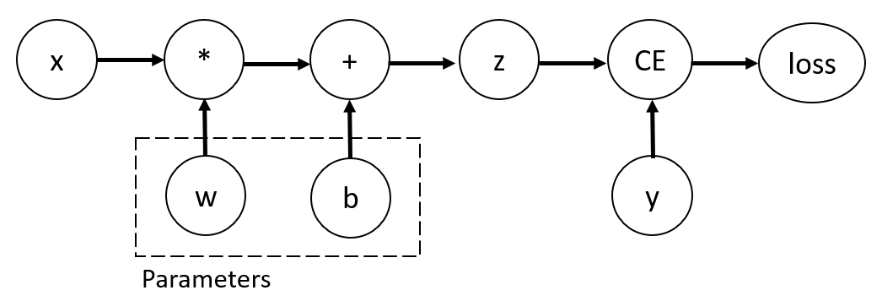

In this network, `w` and `b` are parameters, which we need to optimize. Thus, we need to be able to compute the gradients of loss function with respect to those variables. In order to do that, we set the `requires_grad` property of those tensors.

You can set the value of `requires_grad` when creating a tensor, or later by using `x.requires_grad_(True)` method.

A function that we apply to tensors to construct computational graph is in fact an object of class Function. This object knows how to compute the function in the forward direction, and also how to compute its derivative during the backward propagation step. A reference to the backward propagation function is stored in grad_fn property of a tensor. You can find more information of Function in the documentation.

In [ ]:
print(f"Gradient function for z = {z.grad_fn}")
print(f"Gradient function for loss = {loss.grad_fn}")

### Computing Gradients
To optimize weights of parameters in the neural network, we need to compute the derivatives of our loss function with respect to parameters. To compute those derivatives, we call `loss.backward()`, and then retrieve the values from `w.grad` and `b.grad`:

In [ ]:
loss.backward()
print(w.grad)
print(b.grad)

We can only obtain the grad properties for the leaf nodes of the computational graph, which have `requires_grad` property set to True. For all other nodes in our graph, gradients will not be available.

We can only perform gradient calculations using backward once on a given graph, for performance reasons. If we need to do several backward calls on the same graph, we need to pass `retain_graph=True` to the backward call.

### Disabling Gradient Tracking
By default, all tensors with `requires_grad=True` are tracking their computational history and support gradient computation. However, there are some cases when we do not need to do that, for example, when we have trained the model and just want to apply it to some input data, i.e. we only want to do forward computations through the network. We can stop tracking computations by surrounding our computation code with `torch.no_grad()` block:

In [ ]:
z = torch.matmul(x, w)+b
print(z.requires_grad)

with torch.no_grad():
    z = torch.matmul(x, w)+b
print(z.requires_grad)

Another way to achieve the same result is to use the `detach()` method on the tensor:

In [ ]:
z = torch.matmul(x, w)+b
z_det = z.detach()
print(z_det.requires_grad)

There are reasons you might want to disable gradient tracking:
To mark some parameters in your neural network as frozen parameters.

To speed up computations when you are only doing forward pass, because computations on tensors that do not track gradients would be more efficient.

## **Optimizing Model Parameters**
Now that we have a model and data, it’s time to train, validate and test our model by optimizing its parameters on our data. 

Training a model is an iterative process; in each iteration the model makes a guess about the output, calculates the error in its guess (loss), collects the derivatives of the error with respect to its parameters (as we saw in the previous section), and optimizes these parameters using gradient descent. 

In [35]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

training_data = datasets.FashionMNIST(
    root="/home/ubuntu/data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="/home/ubuntu/data",
    train=False,
    download=True,
    transform=ToTensor()
)

train_dataloader = DataLoader(training_data, batch_size=64)
test_dataloader = DataLoader(test_data, batch_size=64)

class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork()

### Hyperparameters
Hyperparameters are adjustable parameters that let you control the model optimization process. Different hyperparameter values can impact model training and convergence rates (read more about hyperparameter tuning)

We define the following hyperparameters for training:

1. Number of Epochs - the number times to iterate over the dataset

2. Batch Size - the number of data samples propagated through the network before the parameters are updated

3. Learning Rate - how much to update models parameters at each batch/epoch. Smaller values yield slow learning speed, while large values may result in unpredictable behavior during training.

In [36]:
learning_rate = 1e-3
batch_size = 64
epochs = 5

### Optimization Loop
Once we set our hyperparameters, we can then train and optimize our model with an optimization loop. Each iteration of the optimization loop is called an `epoch`.

Each epoch consists of two main parts:

1. The Train Loop - iterate over the training dataset and try to converge to optimal parameters.

2. The Validation/Test Loop - iterate over the test dataset to check if model performance is improving.

### Loss Function
When presented with some training data, our untrained network is likely not to give the correct answer. Loss function measures the degree of dissimilarity of obtained result to the target value, and it is the loss function that we want to minimize during training. 

To calculate the loss we make a prediction using the inputs of our given data sample and compare it against the true data label value.

Common loss functions include `nn.MSELoss` (Mean Square Error) for regression tasks, and `nn.NLLLoss` (Negative Log Likelihood) for classification. `nn.CrossEntropyLoss` combines `nn.LogSoftmax` and `nn.NLLLoss`. We pass our model’s output logits to `nn.CrossEntropyLoss`, which will normalize the logits and compute the prediction error.

In [37]:
# Initialize the loss function
loss_fn = nn.CrossEntropyLoss()

### Optimizer
Optimization is the process of adjusting model parameters to reduce model error in each training step. Optimization algorithms define how this process is performed (in this example we use Stochastic Gradient Descent). All optimization logic is encapsulated in the optimizer object. Here, we use the `SGD` optimizer; additionally, there are many different optimizers available in PyTorch such as `ADAM` and `RMSProp`, that work better for different kinds of models and data.

We initialize the optimizer by registering the model’s parameters that need to be trained, and passing in the learning rate hyperparameter.

In [38]:
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

Inside the training loop, optimization happens in three steps:

1. Call `optimizer.zero_grad() `to reset the gradients of model parameters. Gradients by default add up; to prevent double-counting, we explicitly zero them at each iteration.

2. Backpropagate the prediction loss with a call to `loss.backward()`. PyTorch deposits the gradients of the loss w.r.t. each parameter.

3. Once we have our gradients, we call `optimizer.step()` to adjust the parameters by the gradients collected in the backward pass.

### Full Implementation
We define `train_loop` that loops over our optimization code, and `test_loop` that evaluates the model’s performance against our test data.

In [39]:
def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    # Set the model to training mode - important for batch normalization and dropout layers
    # Unnecessary in this situation but added for best practices
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        # Compute prediction and loss
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * batch_size + len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")


def test_loop(dataloader, model, loss_fn):
    # Set the model to evaluation mode - important for batch normalization and dropout layers
    # Unnecessary in this situation but added for best practices
    model.eval()
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    # Evaluating the model with torch.no_grad() ensures that no gradients are computed during test mode
    # also serves to reduce unnecessary gradient computations and memory usage for tensors with requires_grad=True
    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

We initialize the loss function and optimizer, and pass it to `train_loop` and `test_loop`. Feel free to increase the number of epochs to track the model’s improving performance.

In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

epochs = 10
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(train_dataloader, model, loss_fn, optimizer)
    test_loop(test_dataloader, model, loss_fn)
print("Done!")

### Visualization
We can visualize the model's prediction to see how the model truly performs.

In [ ]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
plt.figure(figsize=(20, 10))

test_sample ={}
for index,batch in enumerate(test_dataloader):
    if index == 1:
        break 
    else:
        test_sample[index] = batch

for index in range(40):
  image, label = test_sample[0][0][index],test_sample[0][1][index]

  # Model inference
  model.eval()
  with torch.no_grad():
    pred = model(image)
    pred = pred.argmax(dim=1)
    
  # Convert from CHW to HWC for visualization
  image = image.permute(1, 2, 0)

  # Convert from class indices to class names
  pred = labels_map[pred.item()]
  label = labels_map[label.item()]

  # Visualize the image
  plt.subplot(4, 10, index + 1)
  plt.imshow(image,cmap="gray")
  plt.title(f"pred: {pred}" + "\n" + f"label: {label}")
  plt.axis("off")
plt.show()

## **Save and Load the Model**
In this section we will look at how to persist model state with saving, loading and running model predictions.

### Saving and Loading Model Weights
PyTorch models store the learned parameters in an internal state dictionary, called `state_dict`. These can be persisted via the `torch.save` method:

In [42]:
torch.save(model.state_dict(), 'model_weights.pth')

To load model weights, you need to create an instance of the same model first, and then load the parameters using `load_state_dict()` method.

In the code below, we set `weights_only=True` to limit the functions executed during unpickling to only those necessary for loading weights. Using `weights_only=True` is considered a best practice when loading weights.

In [ ]:
model = NeuralNetwork()
model.load_state_dict(torch.load('model_weights.pth', weights_only=True))
model.eval()

Be sure to call `model.eval()` method before inferencing to set the dropout and batch normalization layers to evaluation mode. Failing to do this will yield inconsistent inference results.